In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("Time-Wasters on Social Media.csv", sep=',')
df.head()

Saving Time-Wasters on Social Media.csv to Time-Wasters on Social Media.csv


,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data


In [3]:
# Import necessary libraries
from sklearn.decomposition import PCA   # For dimensionality reduction
import matplotlib.pyplot as plt
import numpy as np

# Select only numeric columns from the dataframe for PCA
num_df = df.select_dtypes(include=[np.number])
pca = PCA(n_components=2)
reduced = pca.fit_transform(num_df)     # Fit PCA on the numeric data and transform it to the reduced dimensions

print("Explained variance by components:", pca.explained_variance_ratio_)


Explained variance by components: [0.97121602 0.01459742]


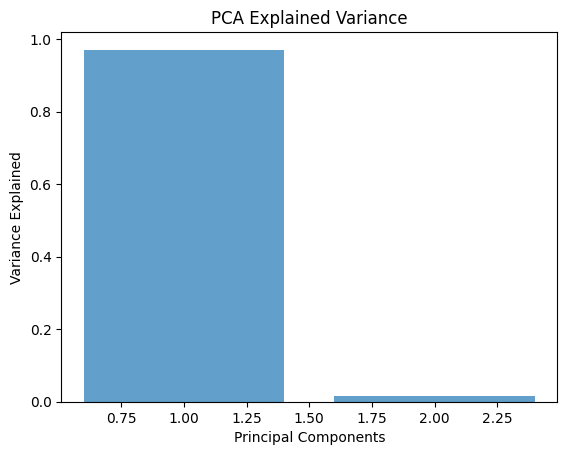

Explained variance by components: [0.97121602 0.01459742]


In [4]:

# Plot a bar chart of the explained variance ratio for the two components
plt.bar(range(1, 3), pca.explained_variance_ratio_, alpha=0.7)
plt.ylabel("Variance Explained")
plt.xlabel("Principal Components")
plt.title("PCA Explained Variance")
plt.show()

print("Explained variance by components:", pca.explained_variance_ratio_)


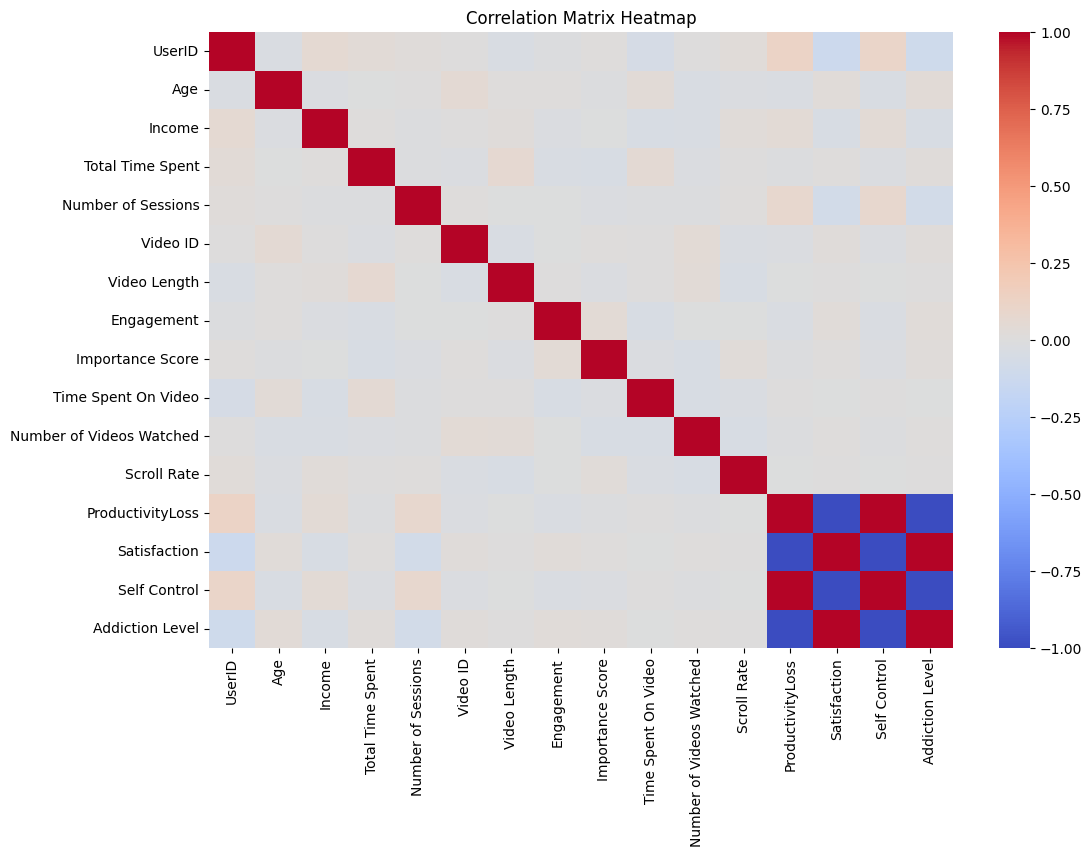

In [5]:

# Select only numerical columns for correlation calculation
num_df = df.select_dtypes(include=np.number)

corr = num_df.corr()

plt.figure(figsize=(12,8))

# Plot the heatmap of correlations
# - cmap="coolwarm" gives a red-blue diverging color scheme
# - center=0 ensures that 0 correlation is the midpoint of the color scale
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Matrix Heatmap")
plt.show()

Correlation between Addiction Level and Productivity Loss:
                   Addiction Level  ProductivityLoss
Addiction Level          1.000000         -0.994939
ProductivityLoss        -0.994939          1.000000


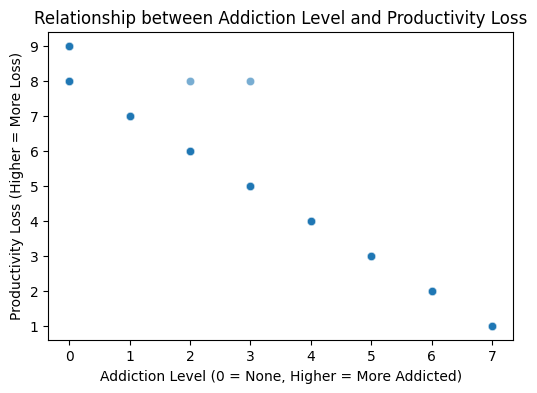

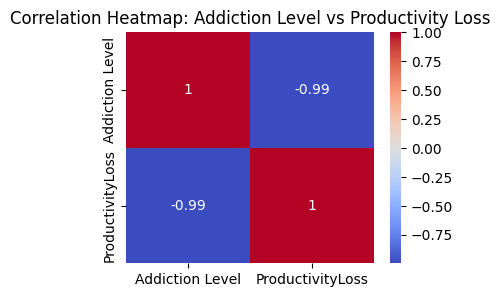

In [6]:

# Select relevant columns (Addiction Level and ProductivityLoss)
subset = df[['Addiction Level', 'ProductivityLoss']]

# Check correlation
correlation = subset.corr()
print("Correlation between Addiction Level and Productivity Loss:\n", correlation)

# Visualization - scatter plot
plt.figure(figsize=(6,4))
sns.scatterplot(x='Addiction Level', y='ProductivityLoss', data=df, alpha=0.6)
plt.title("Relationship between Addiction Level and Productivity Loss")
plt.xlabel("Addiction Level (0 = None, Higher = More Addicted)")
plt.ylabel("Productivity Loss (Higher = More Loss)")
plt.show()

#  Heatmap for correlation
plt.figure(figsize=(4,3))
sns.heatmap(correlation, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap: Addiction Level vs Productivity Loss")
plt.show()